### Load the Packages/Modules

In [5]:
%pip install forex-python
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip install matplotlib
%pip install pyodbc
%pip install numpy

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writ

In [6]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

from forex_python.converter import CurrencyRates
import re 
from scipy.stats import chi2_contingency


### Import Datasets

#### Accessing the Remote Server Datasets

In [7]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP1};PWD={G7x@9kR$2x}"

In [8]:


connection = pyodbc.connect(connection_string)

In [9]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
query2020 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2021 = "SELECT * FROM dbo.LP1_startup_funding2021"
data2020 = pd.read_sql(query2020, connection)
data2021 = pd.read_sql(query2021, connection)



### 2020 Data

In [10]:
data2020.to_csv('startup_funding2020.csv', index=False)

In [11]:
data2021.to_csv('startup_funding2021.csv', index=False)

In [12]:
data2020.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [13]:
data2020.info() # Get inforamation about the data2020 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [14]:
data2020.columns #accessing specific columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [15]:
data2020.describe(include='object') # Getting general descriptive statistics of the data2 dataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,column10
count,1055,961,1042,1055,1043,1017,591,2
unique,905,77,302,990,927,848,42,2
top,Nykaa,Bangalore,Fintech,Provides online learning classes,Byju Raveendran,Venture Catalysts,Series A,Seed Round
freq,6,317,80,4,6,20,96,1


In [16]:
data2020.describe(include='float') # Getting general descriptive statistics for float columns

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


#### Handling Duplicated Data

In [17]:
# checking for duplicated values 

columns_to_check3 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
for column2 in columns_to_check3:
    has_duplicates2 = data2020[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [18]:
# below we are dropping the duplicates rows 

data2020.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [19]:
data2020.isna().sum() #looking for missing values in dataFrame 2

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

**Cleaning HeadQuarter column**

In [20]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
data2020['HeadQuarter'] = data2020['HeadQuarter'].fillna('Notavailable')
data2020.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,Notavailable,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [21]:
data2020['HeadQuarter'].unique() #displaying the unique values found in the 'HeadQuarter' column.

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Notavailable', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Sam

In [22]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore'
data2020['HeadQuarter'] = data2020['HeadQuarter'].str.replace('Bengaluru', 'Bangalore', case=False)
data2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,Notavailable,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


**Cleaning the 'Sector' column**

In [23]:
# Replace all missing values in the 'Sector' column with the string "Unknown".
data2020['Sector'] = data2020['Sector'].fillna('Unknown')
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


**Cleaning the 'Stage' column**

In [24]:
# Replace all missing values in the 'Stage' column with the string "Unknown".
data2020['Stage'] = data2020['Stage'].fillna('Notknown')
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Notknown,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Notknown,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Notknown,None


In [25]:
# Get unique funding stages
data2020['Stage'].unique()

array(['Notknown', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series A', 'Series B', 'Debt', 'Pre-series C',
       'Pre-series B', 'Series E', 'Bridge', 'Series D', 'Series B2',
       'Series F', 'Pre- series A', 'Edge', 'Series H', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [26]:
data2020["column10"].value_counts() # Calculate the frequency count of unique values in the "Amount" column

Seed Round    1
Pre-Seed      1
Name: column10, dtype: int64

In [27]:
data2020[data2020['column10'].isin(['Pre-Seed','Seed Round'])] #checking if the values in the 'column10' column match either 'Pre-Seed' or 'Seed Round'.

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


In [28]:
data2020['Sector'].unique # checking for unique values in the Sector column 

<bound method Series.unique of 0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1052, dtype: object>

In [29]:
data2020['Stage'].unique # checking the unique values in the data set

<bound method Series.unique of 0         Notknown
1         Pre-seed
2         Pre-seed
3         Notknown
4         Notknown
           ...    
1050      Notknown
1051    Seed Round
1052      Notknown
1053      Series C
1054      Series A
Name: Stage, Length: 1052, dtype: object>

In [30]:
data2020["Amount"].value_counts()# Calculate the frequency count of unique values in the "Amount" column

1000000.0      53
2000000.0      39
3000000.0      27
5000000.0      24
500000.0       22
               ..
400000000.0     1
16076000.0      1
25000.0         1
3937000.0       1
2900000.0       1
Name: Amount, Length: 300, dtype: int64

In [31]:
# checking for '-' symbol within the columns
data2020_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']
for col in data2020_to_check_colomns:
    dash_symbols = data2020[col].astype(str).str.contains('—').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: False
HeadQuarter: False
Sector: False
What_it_does: False
Stage: False
Amount: False


In [32]:
# checking for '$' symbol within the columns
data2020_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']

for col in data2020_to_check_colomns:
    dash_symbols = data2020[col].astype(str).str.contains('$').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: True
HeadQuarter: True
Sector: True
What_it_does: True
Stage: True
Amount: True


In [33]:
# Cleaning the Amounts column

data2020['Amount'] = data2020['Amount'].apply(str)
data2020['Amount'].replace(",", "", inplace = True, regex=True)
data2020['Amount'].replace("$", "", inplace = True, regex=True)
data2020['Company_Brand'].replace("$", "", inplace = True, regex=True)
data2020['HeadQuarter'].replace("$", "", inplace = True, regex=True)
data2020['Sector'].replace("$", "", inplace = True, regex=True)
data2020['What_it_does'].replace("$", "", inplace = True, regex=True)
data2020['Stage'].replace("$", "", inplace = True, regex=True)

In [34]:
data2020['Amount'] = data2020['Amount'].astype(float) #converting the values in the "Amount" column of DataFrame data2020 to the float data type.

In [35]:
data2020["Amount"] # checking the amount column to comfirm the changes 

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1052, dtype: float64

In [36]:
data2020['Amount'].min()

12700.0

In [37]:
data2020['Amount'].median()

3000000.0

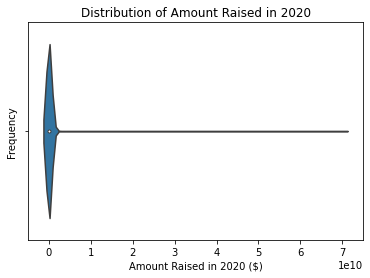

In [38]:
# Create a violin plot to show the distribution of the amount raised in 2020
sns.violinplot(x=data2020['Amount'])
plt.title('Distribution of Amount Raised in 2020')
# Set the x-axis label
plt.xlabel('Amount Raised in 2020 ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [39]:
impute_value = data2020['Amount'].median()
data2020['Amount']= data2020['Amount'].fillna(impute_value)

In [40]:
data2020['Amount'].isnull().sum()

0

In [41]:
data2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter         0
Sector              0
What_it_does        0
Founders           12
Investor           38
Amount              0
Stage               0
column10         1050
dtype: int64

In [42]:
data2020 = data2020.drop(['column10','Founded','Founders','Investor'], axis=1) #dropping specific columns from the DataFrame 

In [43]:
new_column_names = {'Company_Brand': 'Company', 'What_it_does': 'About', 'HeadQuarter': 'Location'} # Renaming columns
data2020 = data2020.rename(columns=new_column_names)

**Creating a new column 'Year' and setting it to 2020**

In [44]:
# create a new column 'Year' and set it to 2020 to differentiate it from the other datasets
data2020.insert(0,'Year', 2020)
data2020.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2020,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Notknown
1,2020,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed
2,2020,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,3000000.0,Pre-seed
3,2020,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Notknown
4,2020,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Notknown


In [45]:
data2020['Amount'].isnull().sum()

0

#### 2021 Data

In [46]:
data2021.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [47]:
data2021.shape #understanding the size of your DataFrame

(1209, 9)

In [48]:
data2021.columns #retrieving the column names of the DataFrame

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [49]:
data2021.info() #providing a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [50]:
data2021.describe(include='object') #providing descriptive statistics for columns of object data type in the DataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208,1209,1209,1205,1147,1206,781
unique,1033,70,254,1143,1095,937,278,31
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,426,122,4,7,24,73,246


In [51]:
data2021.isnull().sum() # looking for missing values in dataFrame

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

#### Handling Duplicated Data

In [52]:
#checking for duplicate values in each column of the DataFrame data2021
columns_to_check4 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

for column4 in columns_to_check4:
    has_duplicates4 = data2021[column4].duplicated().any()
    print(f'{column4}: {has_duplicates4}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [53]:
#removing any rows that have the same values in all the specified columns.
data2021.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [54]:
data2021['HeadQuarter'].unique() # here we are looking at the unique values in the column 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

**Cleaning the 'Headquarter' column**

In [55]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
data2021['HeadQuarter'] = data2021['HeadQuarter'].fillna('Notavailable')
data2021.iloc[28:35].head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
28,TrulyMadly,2013.0,New Delhi,Dating,Trulymadly is a dating platform that uses a ma...,"Hitesh Dhingra, Rahul Kumar, Sachin Bhatia","Gaurav Munjal, Snehil Khanor","$2,000,000",Pre-series A
29,Vidyakul,2018.0,Notavailable,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed
30,Jambox Games,2021.0,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,"$1,100,000",Seed
31,Miko,2015.0,Mumbai,Robotics,Miko is an advanced robotics startup focusing ...,"Chintan Raikar, Prashant Iyengar, Sneh Vaswani","Chiratae Ventures, YourNest Venture Capital","$6,000,000",None
32,SuperK,2019.0,"Small Towns, Andhra Pradesh",Retail,SuperK is a full-stack solution to empower sma...,Neeraj Menta,STRIVE VC,"$800,000",Seed


In [56]:
# Handling the rows with the "\t#REF!" error

df_filtered = data2021[data2021['HeadQuarter'].str.contains('\t#REF!')]

# display the filtered dataframe
df_filtered

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [57]:
# Drop the rows with the "\t#REF!" error. They have wrong values
data2021 = data2021.drop(data2021[data2021['HeadQuarter'].str.contains('\t#REF!')].index)

In [58]:
data2021['Sector'].unique() #looking at the unique value of the Sector column 

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

**Cleaning the 'Stage' column**

In [59]:
# Replace all missing values in the 'Stage' column with the string "Notknown".
data2021['Stage'] = data2021['Stage'].fillna('Notknown')
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",Notknown
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [60]:
# Get unique funding stages
data2021['Stage'].unique()

array(['Pre-series A', 'Notknown', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

**Cleaning 'Amount' column**

In [61]:
data2021["Amount"].unique() # getting unique values 

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [62]:
# checking if these specific values are present in the amount column 

data2021[data2021['Amount'].isin([ 'Seed','JITO Angel Network, LetsVenture','ITO Angel Network, LetsVenture','Pre-series A','ah! Ventures'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,Notknown
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,Notknown


In [63]:
# Cleaning the Amounts column & # removing the currency symbol in data2021

data2021['Amount'] = data2021['Amount'].astype(str).str.replace('[\₹$,]', '', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Undisclosed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('undisclosed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('None', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Upsparks', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Series C', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Seed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('ah! Ventures', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Pre-series A', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('ITO Angel Network LetsVenture', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('J0', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('JNAN', 'NAN', regex=True)
data2021['Amount'].replace(",", "", inplace = True, regex=True)
data2021['Amount'].replace("—", '0', inplace = True, regex=True)
data2021['Amount'].replace("", '0', inplace=True, regex=True)

In [64]:
data2021['Amount'] = data2021['Amount'].astype(float)
type(data2021['Amount'][0])

numpy.float64

In [65]:
data2021['Amount'].isnull().sum()

145

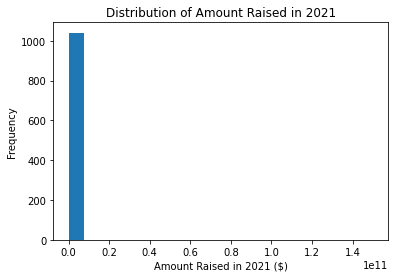

In [66]:
# Plotting A histogram to visualize the distribution of funding

# Histogram
plt.hist(data2021['Amount'], bins=20)
plt.xlabel('Amount Raised in 2021 ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Raised in 2021')
plt.show()

In [67]:
impute_value = data2021['Amount'].median()
data2021['Amount']= data2021['Amount'].fillna(impute_value)

In [68]:
data2021['Amount'].isnull().sum()

0

In [69]:


data2021['Amount'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 3.55e+06, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [70]:
data2021.describe()

,Founded,Amount
count,1186.000000,1.187000e+03
mean,2016.634064,1.517148e+08
std,4.519548,4.353713e+09
min,1963.000000,0.000000e+00
25%,2015.000000,1.000000e+06
50%,2018.000000,3.550000e+06
75%,2020.000000,1.100000e+07
max,2021.000000,1.500000e+11


In [71]:
data2021['Amount'].isnull().sum()

0

In [72]:
data2021['Amount'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 3.55e+06, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [73]:
# Dropping the columns that are not important to our analysis

data2021.drop(columns=['Founders','Founded','Investor'], inplace=True)

In [74]:
data2021.rename(columns = {'Company_Brand':'Company',
                        'HeadQuarter':'Location',
                        'What_it_does':'About'},
             inplace = True)

In [75]:
data2021.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

In [76]:
data2020.columns

Index(['Year', 'Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

**Creating a new column 'Year' and setting it to 2021**

In [77]:
# create a new column 'Year' and set it to 2021 to differentiate it from the other datasets
data2021.insert(0,'Year', 2021)
data2021.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2021,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,Pre-series A
1,2021,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,120000000.0,Notknown
2,2021,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,30000000.0,Series D
3,2021,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,51000000.0,Series C
4,2021,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,Seed


In [78]:
data2020.to_csv('data2020.csv', index=False)

In [79]:
data2021.to_csv('data2021.csv', index=False)